__Tecnológico de Costa Rica__

__Escuela de Física__

IF4702 - Física Computacional I

Grupo 1

Prof. José Esteban Pérez Hidalgo

Prof. Álvaro Amador Jara

Estudiante: Johansell Villalobos Cubillo -- 2018099699
 
Repositorio Git: https://gitlab.com/jkhansell/fisica_computacional.git

<h3><center>Tarea semana 15: Algortimos genéticos<center><h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Descripción de la tarea
El problema del vendedor ambulante es un problema típico de optimización que tiene muchas aplicaciones en distintas áreas. El problema se refiere a buscar la rutas más cortas.

1.  Escriba un algoritmo genético estándar (AG) que busque el camino más corto entre N ciudades.

       a. *Inicialización*: Siga el mismo procedimiento indicado en el algoritmo estándar.
       
       b. *Codificación de los cromosomas*: programe los cromosomas de forma que sus genes contengan permutaciones del orden de las ciudades a visitar. Es decir, para un problema de 4 ciudades los cromosomas pueden tener la forma: [0,3,1,2] o [3,1,0,2], que debe interpretarse como el orden de las ciudades a visitar. La trayectorias son cerradas, es decir, al final del camino se debe regresar al punto de partida, pero el nodo inicial no debe repetirse en el cromosoma.
       
       c. *Función de ajuste*: el valor de ajuste debe tomarse como el inverso de la longitud euclideana de la trayectoria seguida. El programa debe generar secuencias de cromosomas donde no se repitan ciudades a visitar

       d. *Operadores evolucionarios*: deben modificarse para esta implementación de un AG. En este caso no se va a usar un operador de cruce ni un método de selección.
       
       e.  *Operador mutación*: debe implementarse como un intercambio entre las posiciones de dos genes del cromosoma. Es decir, si el cromosoma [1,3,2,0] se selecciona para mutación, deben elegirse dos genes aleatorios del cromosoma, por ejemplo el g0 y el g2. El gen mutado resultante en este caso es [2,3,1,0]. Todos los individuos de la población deben sufrir mutaciones con probabilidad pmut.
       
       f.  *Operador mutación*: debe implementarse como un intercambio entre las posiciones de dos genes del cromosoma. Es decir, si el cromosoma [1,3,2,0] se selecciona para mutación, deben elegirse dos genes aleatorios del cromosoma, por ejemplo el g0 y el g2. El gen mutado resultante en este caso es [2,3,1,0]. Todos los individuos de la población deben sufrir mutaciones con probabilidad pmut.
       
       g. Su programa debe generar un gráfico que muestre las posiciones de las ciudades y la trayectoria más corta encontrada al final de la simulación. Opcionalmente puede generar un gráfico cada vez que un nuevo camino más corto se encuentra. Es decir, cada vez que se encuentra una nueva trayectoria más corta debe generarse un gráfico nuevo. Además podría, también opcionalmente, generar una animación que muestre las trayectorias y las ciudades que se actualice cada vez que se encuentra un nuevo camino más corto.
       
       h. El programa debe guardar el camino más corto como un numpy array en un archivo ```caminoMásCorto_AGE.txt``` y debe imprimir la longitud de este camino más corto encontrado
       
       i. Genere un gráfico que muestre los valores de ajuste promedio de la población y el ajuste del individuo mejor adaptado por cada generación de la simulación. Comente acerca del comportamiento de los valores de ajuste durante la simulación. Además mencione los parámetros utilizados en la simulación y su posible influencia en el comportamiento observado de los valores de ajuste.


### Inicialización

In [2]:
#celda de parámetros
nPop = 50

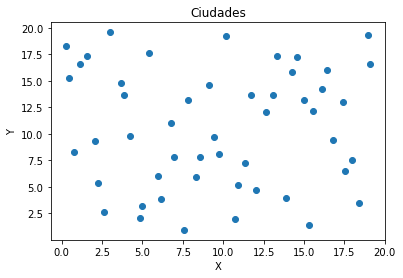

In [3]:
#Leer ciudades
ciudades = np.array([[0.2554, 18.2366],
                    [0.4339, 15.2476],
                    [0.7377, 8.3137],
                    [1.1354, 16.5638],
                    [1.5820, 17.3030],
                    [2.0913, 9.2924],
                    [2.2631, 5.3392],
                    [2.6373, 2.6425],
                    [3.0040, 19.5712],
                    [3.6684, 14.8018],
                    [3.8630, 13.7008],
                    [4.2065, 9.8224],
                    [4.8353, 2.0944],
                    [4.9785, 3.1596],
                    [5.3754, 17.6381],
                    [5.9425, 6.0360],
                    [6.1451, 3.8132],
                    [6.7782, 11.0125],
                    [6.9223, 7.7819],
                    [7.5691, 0.9378],
                    [7.8190, 13.1697],
                    [8.3332, 5.9161],
                    [8.5872, 7.8303],
                    [9.1224, 14.5889], 
                    [9.4076, 9.7166],
                    [9.7208, 8.1154],
                    [10.1662, 19.1705],
                    [10.7387, 2.0090],
                    [10.9354, 5.1813],
                    [11.3707, 7.2406],
                    [11.7418, 13.6874],
                    [12.0526, 4.7186],
                    [12.6385, 12.1000],
                    [13.0950, 13.6956],
                    [13.3533, 17.3524],
                    [13.8794, 3.9479],
                    [14.2674, 15.8651],
                    [14.5520, 17.2489],
                    [14.9737, 13.2245],
                    [15.2841, 1.4455],
                    [15.5761, 12.1270],
                    [16.1313, 14.2029],
                    [16.4388, 16.0084], 
                    [16.7821, 9.4334],
                    [17.3928, 12.9692],
                    [17.5139, 6.4828],
                    [17.9487, 7.5563],
                    [18.3958, 3.5112],
                    [18.9696, 19.3565], 
                    [19.0928, 16.5453]])

plt.scatter(ciudades[:,0],ciudades[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ciudades')
plt.show()

### Codificación de Cromosomas

In [4]:
def inicializacion_pop(nPop, nCiudades):
    
    rng = np.random.default_rng()
    pop = np.zeros((nPop, nCiudades))
    
    for i in range(nPop):
        pop[i] = rng.choice(nCiudades, size=nCiudades, replace = False)
    
    return pop
    

### Función de ajuste

In [5]:
def fajuste(iCrmsm, ciudades):
    
    iCiudad = ciudades[iCrmsm.astype(int)]
    C = np.diff(iCiudad, axis=0)
    d = np.sum(np.sqrt(np.sum(C**2, axis=1)))
    dtot = d + np.sqrt(np.sum((iCiudad[-1]-iCiudad[0])**2))
    
    return -1/dtot

### Operadores Evolucionarios: Mutación

In [6]:
def mutations(pop,pmut):
    """
    Función que muta genes de la población

    percent :: porcentaje de genes a mutar
    pop :: población de individuos

    """
    rng = np.random.default_rng()
    a, b = pop.shape
    
    for i in range(len(pop)):
        poptemp = pop.copy()
        if np.random.rand() > pmut:
            ind = rng.choice(b, size=2, replace = False).astype(int)

            poptemp[i, ind[0]] = pop[i, ind[1]]
            poptemp[i, ind[1]] = pop[i, ind[0]]
        
    return poptemp.astype(int) 



### Encontrar camino más corto

In [ ]:
def GA(ciudades, pmut, ite, nPop):
    nCiudades = len(ciudades)
    mejorpop = np.zeros((ite, nCiudades))
    pop = inicializacion_pop(nPop, nCiudades) #definición de población inicial
    costs = np.zeros(ite)
    for i in range(ite):
        costvect = np.array([fajuste(iCrmsm, 
                                     ciudades) for iCrmsm in pop]) #evaluación de función a optimizar
        sortedind = np.argsort(costvect, axis=None)
        costs[i] = costvect[sortedind[0]]
        pop = pop[sortedind] #ordenamiento de los mejores candidatos
        mejorpop[i] = pop[0]
        pop = mutations(pop, pmut) #ronda de mutación
            
            
    return mejorpop.astype(int), costs

bestiters, minimum = GA(ciudades, 0.20, 10000, nPop)

### Graficación de Resultados

4999

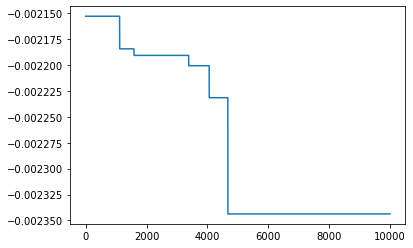

In [8]:
plt.plot(minimum)
ind = np.argsort(minimum, axis=None).astype(int)
caminocorto = bestiters[ind[0]].astype(int)
ind[0]

Secuencia de ciudades a visitar: [31 11 38 48 49 37 34 22 46 33 30 24  1 43 23 19 14  5 20 26  0  3 18 40
 35 16 10 21 29 13  8 28 39 27  6  7 32 36 44 45 41 12  9  4  2 15 42 25
 17 47]

Distancia mínima recorrida: 426.68 [m]


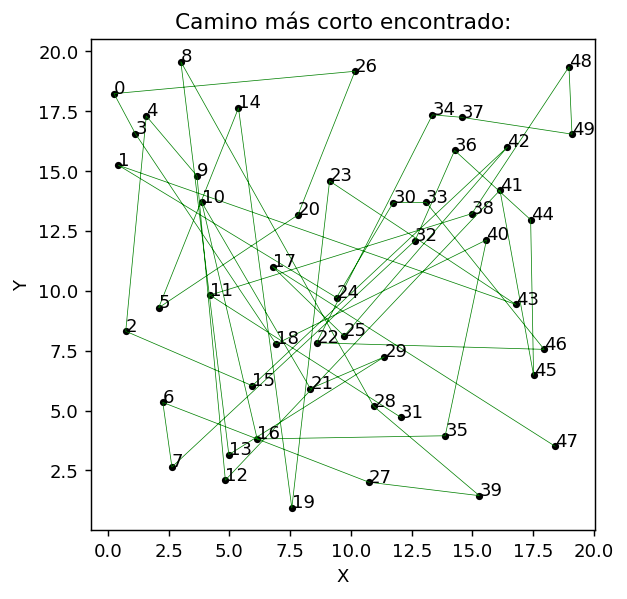

In [9]:
print("Secuencia de ciudades a visitar: "+str(caminocorto)+"\n")
print("Distancia mínima recorrida: {:.2f} [m]".format(-1/minimum[ind[0]]))

coords = ciudades[caminocorto]
plt.figure(figsize=(5,5), dpi=130)
plt.title('Camino más corto encontrado:')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(ciudades[:,0],ciudades[:,1], marker='.', color ='black')
for i in range(len(caminocorto)):
    
    plt.annotate(str(i), (ciudades[i,0],ciudades[i,1]))
plt.plot(coords[:,0], coords[:,1], color = 'green', linewidth=0.4)
plt.show()

np.savetxt('caminoMásCorto_AGE.txt',caminocorto)



### Inicialización Modificada

In [26]:
def inicializacionmodificada(nPop, nCiudades,ciudades):

    rng = np.random.default_rng()
    pop = np.zeros((nPop, nCiudades))
    nodes = rng.choice(nCiudades, size=nPop, replace = False).astype(int)
    
    for i in range(nPop): 
        ciutemp = ciudades.copy()
        iCrmsm = np.zeros(nCiudades, dtype=int)
        iCrmsm[0] = nodes[i]
        iCoords = ciutemp[iCrmsm[0]]
        
        for j in range(1,nCiudades): 
            ciutemp[iCrmsm[j-1]] = 0
            dif = iCoords - ciutemp
            d = np.sqrt(np.sum(dif**2, axis=1))
            ind = np.argsort(d)
            iCrmsm[j] = ind[j]
            iCoords = ciutemp[ind[j]]
            
            
        pop[i] = iCrmsm            
        
    return pop

In [24]:
def mutations2(pop):
    """
    Función que muta genes de la población

    percent :: porcentaje de genes a mutar
    pop :: población de individuos

    """
    rng = np.random.default_rng()
    a, b = pop.shape
    mut = np.random.randint(3,11)
    for j in range(mut):
        for i in range(len(pop)):
            poptemp = pop.copy()
            ind1 = np.random.randint(0,a)
            ind = rng.choice(b, size=2, replace = False).astype(int)

            poptemp[ind1, ind[0]] = pop[ind1, ind[1]]
            poptemp[ind1, ind[1]] = pop[ind1, ind[0]]
        
    return poptemp.astype(int) 


In [43]:
def GAmod(ciudades, pmut, ite, nPop):
    nCiudades = len(ciudades)
    mejorpop = np.zeros((ite, nCiudades))
    pop = inicializacionmodificada(nPop, nCiudades, ciudades) #definición de población inicial
    pop1 = pop
    costs = np.zeros(ite)
    for i in range(ite):
        costvect = np.array([fajuste(iCrmsm, 
                                     ciudades) for iCrmsm in pop]) #evaluación de función a optimizar
        sortedind = np.argsort(costvect, axis=None)
        costs[i] = costvect[sortedind[0]]
        pop = pop[sortedind] #ordenamiento de los mejores candidatos
        mejorpop[i] = pop[0]
        pop = mutations2(pop) #ronda de mutación
            
                
    return mejorpop.astype(int), costs

bestiters2, minimum2 = GAmod(ciudades, 0.20, 5000, nPop)

207

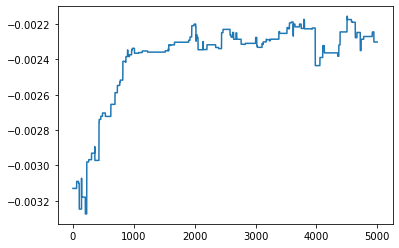

In [44]:
plt.plot(minimum2)
ind2= np.argsort(minimum2, axis=None).astype(int)
caminocorto2 = bestiters2[ind2[0]].astype(int)
ind2[0]

Secuencia de ciudades a visitar: [35 39 12  6 13 16 19  2 15  5 21 18 11 17 22 28 25 27 31 29 24 10  9  1
 20  7  3 23  4 32 30  0 14 26 47 33 43 46 40  8 38 36 41 44 45 34 37 42
 49 48]

Distancia mínima recorrida: 305.40 [m]


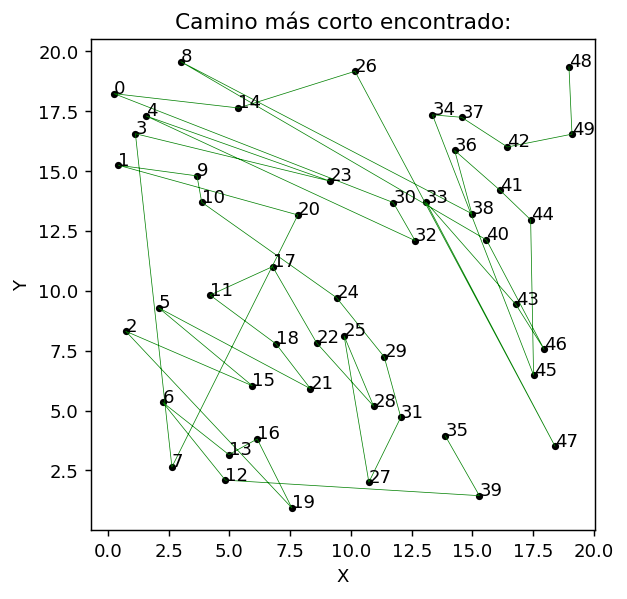

In [46]:
print("Secuencia de ciudades a visitar: "+str(caminocorto2)+"\n")
print("Distancia mínima recorrida: {:.2f} [m]".format(-1/minimum2[ind2[0]]))

coords2 = ciudades[caminocorto2]
plt.figure(figsize=(5,5), dpi=130)
plt.title('Camino más corto encontrado:')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(ciudades[:,0],ciudades[:,1], marker='.', color ='black')
for i in range(len(caminocorto2)):
    
    plt.annotate(str(i), (ciudades[i,0],ciudades[i,1]))
plt.plot(coords2[:,0], coords2[:,1], color = 'green', linewidth=0.4)
plt.show()

np.savetxt('caminoMásCorto_AGE.txt',caminocorto)

